In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="RNN seq 1024.", name="epoch 2000")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.SimpleRNN(1024, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=2000, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1024)              1051648   
                                                                 
 dense (Dense)               (None, 25)                25625     
                                                                 
Total params: 1,077,273
Trainable params: 1,077,273
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/2000
5/5 [==============================] - ETA: 0s - loss: 0.9290 - mae: 0.7971INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 665ms/step - loss: 0.9290 - mae: 0.7971 - val_loss: 0.3351 - val_mae: 0.4661
Epoch 2/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.3555 - mae: 0.4802INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 542ms/step - loss: 0.3465 - mae: 0.4736 - val_loss: 0.2631 - val_mae: 0.4195
Epoch 3/2000
5/5 [==============================] - 1s 195ms/step - loss: 0.2784 - mae: 0.4294 - val_loss: 0.2653 - val_mae: 0.4154
Epoch 4/2000
5/5 [==============================] - ETA: 0s - loss: 0.2615 - mae: 0.4105INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 544ms/step - loss: 0.2615 - mae: 0.4105 - val_loss: 0.2525 - val_mae: 0.4107
Epoch 5/2000
5/5 [==============================] - ETA: 0s - loss: 0.2474 - mae: 0.4041INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 552ms/step - loss: 0.2474 - mae: 0.4041 - val_loss: 0.2252 - val_mae: 0.3936
Epoch 6/2000
5/5 [==============================] - ETA: 0s - loss: 0.2309 - mae: 0.3917INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 573ms/step - loss: 0.2309 - mae: 0.3917 - val_loss: 0.1968 - val_mae: 0.3658
Epoch 7/2000
5/5 [==============================] - ETA: 0s - loss: 0.2035 - mae: 0.3701INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 509ms/step - loss: 0.2035 - mae: 0.3701 - val_loss: 0.1876 - val_mae: 0.3602
Epoch 8/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.1962 - mae: 0.3642INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 595ms/step - loss: 0.1983 - mae: 0.3671 - val_loss: 0.1868 - val_mae: 0.3577
Epoch 9/2000
5/5 [==============================] - 1s 193ms/step - loss: 0.1858 - mae: 0.3565 - val_loss: 0.1912 - val_mae: 0.3651
Epoch 10/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.1928 - mae: 0.3639INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 515ms/step - loss: 0.1936 - mae: 0.3650 - val_loss: 0.1865 - val_mae: 0.3562
Epoch 11/2000
5/5 [==============================] - 1s 188ms/step - loss: 0.1917 - mae: 0.3586 - val_loss: 0.1902 - val_mae: 0.3638
Epoch 12/2000
5/5 [==============================] - 1s 158ms/step - loss: 0.1945 - mae: 0.3623 - val_loss: 0.2198 - val_mae: 0.3822
Epoch 13/2000
5/5 [==============================] - ETA: 0s - loss: 0.1941 - mae: 0.3615INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 576ms/step - loss: 0.1941 - mae: 0.3615 - val_loss: 0.1780 - val_mae: 0.3518
Epoch 14/2000
5/5 [==============================] - ETA: 0s - loss: 0.1793 - mae: 0.3503INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 533ms/step - loss: 0.1793 - mae: 0.3503 - val_loss: 0.1779 - val_mae: 0.3489
Epoch 15/2000
5/5 [==============================] - ETA: 0s - loss: 0.1897 - mae: 0.3584INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 530ms/step - loss: 0.1897 - mae: 0.3584 - val_loss: 0.1747 - val_mae: 0.3467
Epoch 16/2000
5/5 [==============================] - 1s 191ms/step - loss: 0.2032 - mae: 0.3717 - val_loss: 0.1757 - val_mae: 0.3443
Epoch 17/2000
5/5 [==============================] - 1s 158ms/step - loss: 0.1850 - mae: 0.3516 - val_loss: 0.2243 - val_mae: 0.3906
Epoch 18/2000
5/5 [==============================] - 1s 154ms/step - loss: 0.2166 - mae: 0.3811 - val_loss: 0.2389 - val_mae: 0.4048
Epoch 19/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.2019 - mae: 0.3679 - val_loss: 0.1780 - val_mae: 0.3499
Epoch 20/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.1772 - mae: 0.3466 - val_loss: 0.1783 - val_mae: 0.3475
Epoch 21/2000
5/5 [==============================] - ETA: 0s - loss: 0.1809 - mae: 0.3489INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\fil

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 537ms/step - loss: 0.1809 - mae: 0.3489 - val_loss: 0.1658 - val_mae: 0.3387
Epoch 22/2000
5/5 [==============================] - 1s 177ms/step - loss: 0.1837 - mae: 0.3492 - val_loss: 0.1863 - val_mae: 0.3572
Epoch 23/2000
5/5 [==============================] - 1s 155ms/step - loss: 0.1906 - mae: 0.3532 - val_loss: 0.2684 - val_mae: 0.4240
Epoch 24/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.2424 - mae: 0.3996 - val_loss: 0.1793 - val_mae: 0.3478
Epoch 25/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.2131 - mae: 0.3761 - val_loss: 0.2823 - val_mae: 0.4386
Epoch 26/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.2142 - mae: 0.3739 - val_loss: 0.1675 - val_mae: 0.3393
Epoch 27/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.1839 - mae: 0.3539 - val_loss: 0.2008 - val_mae: 0.3688
Epoch 28/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.2055 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 511ms/step - loss: 0.1884 - mae: 0.3541 - val_loss: 0.1651 - val_mae: 0.3354
Epoch 36/2000
5/5 [==============================] - 1s 172ms/step - loss: 0.1719 - mae: 0.3389 - val_loss: 0.1687 - val_mae: 0.3389
Epoch 37/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.1677 - mae: 0.3325 - val_loss: 0.2629 - val_mae: 0.4201
Epoch 38/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.2186 - mae: 0.3816 - val_loss: 0.3485 - val_mae: 0.4910
Epoch 39/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.3078 - mae: 0.4576 - val_loss: 0.2870 - val_mae: 0.4387
Epoch 40/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.2672 - mae: 0.4219 - val_loss: 0.3751 - val_mae: 0.5047
Epoch 41/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.2859 - mae: 0.4324 - val_loss: 0.2981 - val_mae: 0.4459
Epoch 42/2000
5/5 [==============================] - 1s 158ms/step - loss: 0.2600 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 491ms/step - loss: 0.1687 - mae: 0.3378 - val_loss: 0.1596 - val_mae: 0.3305
Epoch 52/2000
5/5 [==============================] - 1s 157ms/step - loss: 0.1808 - mae: 0.3492 - val_loss: 0.2054 - val_mae: 0.3714
Epoch 53/2000
5/5 [==============================] - 1s 157ms/step - loss: 0.1746 - mae: 0.3424 - val_loss: 0.1727 - val_mae: 0.3394
Epoch 54/2000
5/5 [==============================] - ETA: 0s - loss: 0.1647 - mae: 0.3322INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 569ms/step - loss: 0.1647 - mae: 0.3322 - val_loss: 0.1475 - val_mae: 0.3144
Epoch 55/2000
5/5 [==============================] - 1s 155ms/step - loss: 0.1580 - mae: 0.3264 - val_loss: 0.1568 - val_mae: 0.3253
Epoch 56/2000
5/5 [==============================] - 1s 147ms/step - loss: 0.1657 - mae: 0.3336 - val_loss: 0.2448 - val_mae: 0.4035
Epoch 57/2000
5/5 [==============================] - 1s 144ms/step - loss: 0.2343 - mae: 0.3923 - val_loss: 0.2912 - val_mae: 0.4489
Epoch 58/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.2715 - mae: 0.4208 - val_loss: 0.3570 - val_mae: 0.4943
Epoch 59/2000
5/5 [==============================] - 1s 159ms/step - loss: 0.2482 - mae: 0.4062 - val_loss: 0.1948 - val_mae: 0.3615
Epoch 60/2000
5/5 [==============================] - 1s 144ms/step - loss: 0.2065 - mae: 0.3710 - val_loss: 0.1867 - val_mae: 0.3566
Epoch 61/2000
5/5 [==============================] - 1s 145ms/step - loss: 0.2142 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 499ms/step - loss: 0.1505 - mae: 0.3189 - val_loss: 0.1385 - val_mae: 0.3080
Epoch 71/2000
5/5 [==============================] - 1s 175ms/step - loss: 0.1424 - mae: 0.3087 - val_loss: 0.1512 - val_mae: 0.3158
Epoch 72/2000
5/5 [==============================] - 1s 154ms/step - loss: 0.1438 - mae: 0.3104 - val_loss: 0.1447 - val_mae: 0.3128
Epoch 73/2000
5/5 [==============================] - ETA: 0s - loss: 0.1411 - mae: 0.3053INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 524ms/step - loss: 0.1411 - mae: 0.3053 - val_loss: 0.1095 - val_mae: 0.2731
Epoch 74/2000
5/5 [==============================] - 1s 163ms/step - loss: 0.1709 - mae: 0.3394 - val_loss: 0.1140 - val_mae: 0.2753
Epoch 75/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.1194 - mae: 0.2815 - val_loss: 0.2608 - val_mae: 0.4245
Epoch 76/2000
5/5 [==============================] - 1s 142ms/step - loss: 0.1870 - mae: 0.3519 - val_loss: 0.1922 - val_mae: 0.3620
Epoch 77/2000
5/5 [==============================] - 1s 147ms/step - loss: 0.2022 - mae: 0.3688 - val_loss: 0.2313 - val_mae: 0.3980
Epoch 78/2000
5/5 [==============================] - 1s 155ms/step - loss: 0.2229 - mae: 0.3774 - val_loss: 0.3433 - val_mae: 0.4900
Epoch 79/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.2463 - mae: 0.4022 - val_loss: 0.1836 - val_mae: 0.3529
Epoch 80/2000
5/5 [==============================] - 1s 162ms/step - loss: 0.2063 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 822ms/step - loss: 0.1375 - mae: 0.3007 - val_loss: 0.1065 - val_mae: 0.2684
Epoch 93/2000
5/5 [==============================] - 1s 165ms/step - loss: 0.1145 - mae: 0.2708 - val_loss: 0.1716 - val_mae: 0.3449
Epoch 94/2000
5/5 [==============================] - 1s 145ms/step - loss: 0.1271 - mae: 0.2889 - val_loss: 0.2204 - val_mae: 0.3898
Epoch 95/2000
5/5 [==============================] - 1s 141ms/step - loss: 0.1737 - mae: 0.3454 - val_loss: 0.1941 - val_mae: 0.3637
Epoch 96/2000
5/5 [==============================] - 1s 155ms/step - loss: 0.1558 - mae: 0.3241 - val_loss: 0.1832 - val_mae: 0.3428
Epoch 97/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.1801 - mae: 0.3456 - val_loss: 0.2059 - val_mae: 0.3705
Epoch 98/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.1816 - mae: 0.3415 - val_loss: 0.1620 - val_mae: 0.3299
Epoch 99/2000
5/5 [==============================] - 1s 161ms/step - loss: 0.1765 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 521ms/step - loss: 0.1079 - mae: 0.2646 - val_loss: 0.0802 - val_mae: 0.2265
Epoch 112/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0848 - mae: 0.2317INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 513ms/step - loss: 0.0847 - mae: 0.2318 - val_loss: 0.0752 - val_mae: 0.2090
Epoch 113/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.1281 - mae: 0.2905INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 521ms/step - loss: 0.1294 - mae: 0.2919 - val_loss: 0.0688 - val_mae: 0.2053
Epoch 114/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.0906 - mae: 0.2374 - val_loss: 0.2353 - val_mae: 0.4112
Epoch 115/2000
5/5 [==============================] - 1s 155ms/step - loss: 0.1322 - mae: 0.2905 - val_loss: 0.0866 - val_mae: 0.2352
Epoch 116/2000
5/5 [==============================] - 1s 154ms/step - loss: 0.0922 - mae: 0.2409 - val_loss: 0.1139 - val_mae: 0.2770
Epoch 117/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0960 - mae: 0.2514 - val_loss: 0.1795 - val_mae: 0.3521
Epoch 118/2000
5/5 [==============================] - 1s 155ms/step - loss: 0.1643 - mae: 0.3294 - val_loss: 0.1581 - val_mae: 0.3318
Epoch 119/2000
5/5 [==============================] - 1s 146ms/step - loss: 0.1436 - mae: 0.3061 - val_loss: 0.0869 - val_mae: 0.2392
Epoch 120/2000
5/5 [==============================] - 1s 149ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 515ms/step - loss: 0.0874 - mae: 0.2342 - val_loss: 0.0670 - val_mae: 0.2021
Epoch 126/2000
5/5 [==============================] - 1s 195ms/step - loss: 0.0676 - mae: 0.2026 - val_loss: 0.0777 - val_mae: 0.2144
Epoch 127/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.1078 - mae: 0.2666 - val_loss: 0.0830 - val_mae: 0.2261
Epoch 128/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0853 - mae: 0.2323 - val_loss: 0.0704 - val_mae: 0.2045
Epoch 129/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0721 - mae: 0.2109INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 486ms/step - loss: 0.0737 - mae: 0.2135 - val_loss: 0.0670 - val_mae: 0.2061
Epoch 130/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0650 - mae: 0.2001INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 530ms/step - loss: 0.0647 - mae: 0.1991 - val_loss: 0.0657 - val_mae: 0.1955
Epoch 131/2000
5/5 [==============================] - 1s 192ms/step - loss: 0.0599 - mae: 0.1905 - val_loss: 0.0658 - val_mae: 0.1966
Epoch 132/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0755 - mae: 0.2168 - val_loss: 0.0805 - val_mae: 0.2209
Epoch 133/2000
5/5 [==============================] - ETA: 0s - loss: 0.0656 - mae: 0.1995INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 541ms/step - loss: 0.0656 - mae: 0.1995 - val_loss: 0.0600 - val_mae: 0.1929
Epoch 134/2000
5/5 [==============================] - 1s 183ms/step - loss: 0.0623 - mae: 0.1949 - val_loss: 0.0606 - val_mae: 0.1900
Epoch 135/2000
5/5 [==============================] - 1s 144ms/step - loss: 0.0683 - mae: 0.2036 - val_loss: 0.0617 - val_mae: 0.1937
Epoch 136/2000
5/5 [==============================] - 1s 145ms/step - loss: 0.0591 - mae: 0.1901 - val_loss: 0.0622 - val_mae: 0.1957
Epoch 137/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0605 - mae: 0.1923 - val_loss: 0.0603 - val_mae: 0.1916
Epoch 138/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0611 - mae: 0.1929 - val_loss: 0.0711 - val_mae: 0.2079
Epoch 139/2000
5/5 [==============================] - ETA: 0s - loss: 0.0608 - mae: 0.1925INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfn

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 488ms/step - loss: 0.0608 - mae: 0.1925 - val_loss: 0.0556 - val_mae: 0.1807
Epoch 140/2000
5/5 [==============================] - 1s 184ms/step - loss: 0.0586 - mae: 0.1882 - val_loss: 0.0673 - val_mae: 0.2120
Epoch 141/2000
5/5 [==============================] - 1s 156ms/step - loss: 0.0624 - mae: 0.1961 - val_loss: 0.0763 - val_mae: 0.2219
Epoch 142/2000
5/5 [==============================] - 1s 162ms/step - loss: 0.0650 - mae: 0.2020 - val_loss: 0.0601 - val_mae: 0.1910
Epoch 143/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0552 - mae: 0.1840INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 529ms/step - loss: 0.0545 - mae: 0.1823 - val_loss: 0.0548 - val_mae: 0.1762
Epoch 144/2000
5/5 [==============================] - 1s 162ms/step - loss: 0.0579 - mae: 0.1885 - val_loss: 0.0582 - val_mae: 0.1856
Epoch 145/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0505 - mae: 0.1720 - val_loss: 0.0567 - val_mae: 0.1873
Epoch 146/2000
5/5 [==============================] - ETA: 0s - loss: 0.0658 - mae: 0.2033INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 527ms/step - loss: 0.0658 - mae: 0.2033 - val_loss: 0.0530 - val_mae: 0.1791
Epoch 147/2000
5/5 [==============================] - 1s 167ms/step - loss: 0.0600 - mae: 0.1931 - val_loss: 0.0638 - val_mae: 0.1948
Epoch 148/2000
5/5 [==============================] - 1s 154ms/step - loss: 0.0619 - mae: 0.1963 - val_loss: 0.0619 - val_mae: 0.1882
Epoch 149/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.0615 - mae: 0.1930 - val_loss: 0.0640 - val_mae: 0.1973
Epoch 150/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0574 - mae: 0.1874 - val_loss: 0.0539 - val_mae: 0.1815
Epoch 151/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0518 - mae: 0.1749 - val_loss: 0.0535 - val_mae: 0.1813
Epoch 152/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0490 - mae: 0.1706 - val_loss: 0.0665 - val_mae: 0.2090
Epoch 153/2000
5/5 [==============================] - 1s 151ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 521ms/step - loss: 0.0488 - mae: 0.1733 - val_loss: 0.0475 - val_mae: 0.1722
Epoch 168/2000
5/5 [==============================] - 1s 169ms/step - loss: 0.0448 - mae: 0.1644 - val_loss: 0.0663 - val_mae: 0.2077
Epoch 169/2000
5/5 [==============================] - 1s 155ms/step - loss: 0.0656 - mae: 0.2076 - val_loss: 0.0996 - val_mae: 0.2697
Epoch 170/2000
5/5 [==============================] - 1s 154ms/step - loss: 0.0677 - mae: 0.2093 - val_loss: 0.0556 - val_mae: 0.1815
Epoch 171/2000
5/5 [==============================] - 1s 154ms/step - loss: 0.0583 - mae: 0.1891 - val_loss: 0.0541 - val_mae: 0.1804
Epoch 172/2000
5/5 [==============================] - ETA: 0s - loss: 0.0562 - mae: 0.1875INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 506ms/step - loss: 0.0562 - mae: 0.1875 - val_loss: 0.0465 - val_mae: 0.1698
Epoch 173/2000
5/5 [==============================] - 1s 184ms/step - loss: 0.0570 - mae: 0.1893 - val_loss: 0.0570 - val_mae: 0.1889
Epoch 174/2000
5/5 [==============================] - 1s 156ms/step - loss: 0.0579 - mae: 0.1909 - val_loss: 0.0675 - val_mae: 0.2112
Epoch 175/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0502 - mae: 0.1754 - val_loss: 0.0469 - val_mae: 0.1699
Epoch 176/2000
5/5 [==============================] - ETA: 0s - loss: 0.0455 - mae: 0.1643INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 529ms/step - loss: 0.0455 - mae: 0.1643 - val_loss: 0.0411 - val_mae: 0.1571
Epoch 177/2000
5/5 [==============================] - 1s 185ms/step - loss: 0.0419 - mae: 0.1579 - val_loss: 0.0765 - val_mae: 0.2304
Epoch 178/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0536 - mae: 0.1833 - val_loss: 0.0920 - val_mae: 0.2514
Epoch 179/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0730 - mae: 0.2202 - val_loss: 0.0510 - val_mae: 0.1825
Epoch 180/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0544 - mae: 0.1846 - val_loss: 0.0721 - val_mae: 0.2173
Epoch 181/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.0496 - mae: 0.1760 - val_loss: 0.0709 - val_mae: 0.2130
Epoch 182/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0646 - mae: 0.2032 - val_loss: 0.0648 - val_mae: 0.2120
Epoch 183/2000
5/5 [==============================] - 1s 152ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 497ms/step - loss: 0.0534 - mae: 0.1870 - val_loss: 0.0400 - val_mae: 0.1546
Epoch 192/2000
5/5 [==============================] - 1s 173ms/step - loss: 0.0616 - mae: 0.2003 - val_loss: 0.0453 - val_mae: 0.1688
Epoch 193/2000
5/5 [==============================] - ETA: 0s - loss: 0.0483 - mae: 0.1741INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 498ms/step - loss: 0.0483 - mae: 0.1741 - val_loss: 0.0391 - val_mae: 0.1597
Epoch 194/2000
5/5 [==============================] - 1s 187ms/step - loss: 0.0456 - mae: 0.1672 - val_loss: 0.0605 - val_mae: 0.1964
Epoch 195/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0474 - mae: 0.1718INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 520ms/step - loss: 0.0471 - mae: 0.1713 - val_loss: 0.0379 - val_mae: 0.1543
Epoch 196/2000
5/5 [==============================] - 1s 167ms/step - loss: 0.0356 - mae: 0.1495 - val_loss: 0.0477 - val_mae: 0.1709
Epoch 197/2000
5/5 [==============================] - ETA: 0s - loss: 0.0473 - mae: 0.1739INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 491ms/step - loss: 0.0473 - mae: 0.1739 - val_loss: 0.0344 - val_mae: 0.1482
Epoch 198/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.0416 - mae: 0.1628 - val_loss: 0.0441 - val_mae: 0.1691
Epoch 199/2000
5/5 [==============================] - ETA: 0s - loss: 0.0425 - mae: 0.1629INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 496ms/step - loss: 0.0425 - mae: 0.1629 - val_loss: 0.0342 - val_mae: 0.1442
Epoch 200/2000
5/5 [==============================] - ETA: 0s - loss: 0.0313 - mae: 0.1385INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 556ms/step - loss: 0.0313 - mae: 0.1385 - val_loss: 0.0313 - val_mae: 0.1405
Epoch 201/2000
5/5 [==============================] - 1s 190ms/step - loss: 0.0274 - mae: 0.1299 - val_loss: 0.0318 - val_mae: 0.1442
Epoch 202/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0266 - mae: 0.1294INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 505ms/step - loss: 0.0269 - mae: 0.1301 - val_loss: 0.0307 - val_mae: 0.1412
Epoch 203/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.0266 - mae: 0.1301 - val_loss: 0.0313 - val_mae: 0.1407
Epoch 204/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0296 - mae: 0.1366 - val_loss: 0.0316 - val_mae: 0.1437
Epoch 205/2000
5/5 [==============================] - ETA: 0s - loss: 0.0273 - mae: 0.1301INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 500ms/step - loss: 0.0273 - mae: 0.1301 - val_loss: 0.0268 - val_mae: 0.1323
Epoch 206/2000
5/5 [==============================] - ETA: 0s - loss: 0.0239 - mae: 0.1233INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 552ms/step - loss: 0.0239 - mae: 0.1233 - val_loss: 0.0259 - val_mae: 0.1287
Epoch 207/2000
5/5 [==============================] - 1s 190ms/step - loss: 0.0276 - mae: 0.1338 - val_loss: 0.1236 - val_mae: 0.3158
Epoch 208/2000
5/5 [==============================] - 1s 147ms/step - loss: 0.0593 - mae: 0.1991 - val_loss: 0.0858 - val_mae: 0.2474
Epoch 209/2000
5/5 [==============================] - 1s 145ms/step - loss: 0.0522 - mae: 0.1870 - val_loss: 0.0460 - val_mae: 0.1763
Epoch 210/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0446 - mae: 0.1727 - val_loss: 0.0310 - val_mae: 0.1429
Epoch 211/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0360 - mae: 0.1522 - val_loss: 0.0291 - val_mae: 0.1360
Epoch 212/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0288 - mae: 0.1325 - val_loss: 0.0262 - val_mae: 0.1267
Epoch 213/2000
5/5 [==============================] - 1s 149ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 494ms/step - loss: 0.0228 - mae: 0.1203 - val_loss: 0.0240 - val_mae: 0.1266
Epoch 215/2000
5/5 [==============================] - ETA: 0s - loss: 0.0197 - mae: 0.1120INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 544ms/step - loss: 0.0197 - mae: 0.1120 - val_loss: 0.0235 - val_mae: 0.1235
Epoch 216/2000
5/5 [==============================] - ETA: 0s - loss: 0.0218 - mae: 0.1170INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 558ms/step - loss: 0.0218 - mae: 0.1170 - val_loss: 0.0233 - val_mae: 0.1232
Epoch 217/2000
5/5 [==============================] - 1s 184ms/step - loss: 0.0192 - mae: 0.1109 - val_loss: 0.0303 - val_mae: 0.1413
Epoch 218/2000
5/5 [==============================] - 1s 146ms/step - loss: 0.0269 - mae: 0.1312 - val_loss: 0.0267 - val_mae: 0.1336
Epoch 219/2000
5/5 [==============================] - ETA: 0s - loss: 0.0232 - mae: 0.1228INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 484ms/step - loss: 0.0232 - mae: 0.1228 - val_loss: 0.0222 - val_mae: 0.1195
Epoch 220/2000
5/5 [==============================] - 1s 175ms/step - loss: 0.0202 - mae: 0.1125 - val_loss: 0.0362 - val_mae: 0.1565
Epoch 221/2000
5/5 [==============================] - ETA: 0s - loss: 0.0235 - mae: 0.1228INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 528ms/step - loss: 0.0235 - mae: 0.1228 - val_loss: 0.0206 - val_mae: 0.1125
Epoch 222/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.0217 - mae: 0.1171 - val_loss: 0.0272 - val_mae: 0.1320
Epoch 223/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0309 - mae: 0.1425 - val_loss: 0.0502 - val_mae: 0.1831
Epoch 224/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0351 - mae: 0.1514 - val_loss: 0.0265 - val_mae: 0.1335
Epoch 225/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0216 - mae: 0.1179 - val_loss: 0.0574 - val_mae: 0.1987
Epoch 226/2000
5/5 [==============================] - ETA: 0s - loss: 0.0309 - mae: 0.1434INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 502ms/step - loss: 0.0309 - mae: 0.1434 - val_loss: 0.0199 - val_mae: 0.1131
Epoch 227/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.0188 - mae: 0.1096 - val_loss: 0.0234 - val_mae: 0.1254
Epoch 228/2000
5/5 [==============================] - ETA: 0s - loss: 0.0175 - mae: 0.1046INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 501ms/step - loss: 0.0175 - mae: 0.1046 - val_loss: 0.0197 - val_mae: 0.1109
Epoch 229/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.0155 - mae: 0.0984 - val_loss: 0.0312 - val_mae: 0.1457
Epoch 230/2000
5/5 [==============================] - ETA: 0s - loss: 0.0185 - mae: 0.1082INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 519ms/step - loss: 0.0185 - mae: 0.1082 - val_loss: 0.0167 - val_mae: 0.1022
Epoch 231/2000
5/5 [==============================] - 1s 197ms/step - loss: 0.0159 - mae: 0.0993 - val_loss: 0.0270 - val_mae: 0.1331
Epoch 232/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0313 - mae: 0.1450 - val_loss: 0.0182 - val_mae: 0.1075
Epoch 233/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0223 - mae: 0.1201 - val_loss: 0.0220 - val_mae: 0.1176
Epoch 234/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0215 - mae: 0.1178 - val_loss: 0.0192 - val_mae: 0.1101
Epoch 235/2000
5/5 [==============================] - ETA: 0s - loss: 0.0173 - mae: 0.1048INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 529ms/step - loss: 0.0173 - mae: 0.1048 - val_loss: 0.0167 - val_mae: 0.1015
Epoch 236/2000
5/5 [==============================] - 1s 186ms/step - loss: 0.0131 - mae: 0.0913 - val_loss: 0.0189 - val_mae: 0.1102
Epoch 237/2000
5/5 [==============================] - ETA: 0s - loss: 0.0149 - mae: 0.0979INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 504ms/step - loss: 0.0149 - mae: 0.0979 - val_loss: 0.0145 - val_mae: 0.0955
Epoch 238/2000
5/5 [==============================] - ETA: 0s - loss: 0.0162 - mae: 0.1012INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 548ms/step - loss: 0.0162 - mae: 0.1012 - val_loss: 0.0140 - val_mae: 0.0949
Epoch 239/2000
5/5 [==============================] - ETA: 0s - loss: 0.0127 - mae: 0.0893INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 519ms/step - loss: 0.0127 - mae: 0.0893 - val_loss: 0.0132 - val_mae: 0.0918
Epoch 240/2000
5/5 [==============================] - 1s 192ms/step - loss: 0.0130 - mae: 0.0910 - val_loss: 0.0155 - val_mae: 0.0991
Epoch 241/2000
5/5 [==============================] - 1s 147ms/step - loss: 0.0141 - mae: 0.0943 - val_loss: 0.0147 - val_mae: 0.0954
Epoch 242/2000
5/5 [==============================] - 1s 147ms/step - loss: 0.0124 - mae: 0.0896 - val_loss: 0.0249 - val_mae: 0.1301
Epoch 243/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0169 - mae: 0.1050 - val_loss: 0.0193 - val_mae: 0.1125
Epoch 244/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0201 - mae: 0.1132 - val_loss: 0.0173 - val_mae: 0.1057
Epoch 245/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0260 - mae: 0.1309 - val_loss: 0.0273 - val_mae: 0.1327
Epoch 246/2000
5/5 [==============================] - 1s 145ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 489ms/step - loss: 0.0186 - mae: 0.1105 - val_loss: 0.0123 - val_mae: 0.0886
Epoch 258/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.0108 - mae: 0.0831 - val_loss: 0.0202 - val_mae: 0.1147
Epoch 259/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0160 - mae: 0.1017 - val_loss: 0.0138 - val_mae: 0.0923
Epoch 260/2000
5/5 [==============================] - 1s 147ms/step - loss: 0.0125 - mae: 0.0895 - val_loss: 0.0140 - val_mae: 0.0933
Epoch 261/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0148 - mae: 0.0964 - val_loss: 0.0221 - val_mae: 0.1220
Epoch 262/2000
5/5 [==============================] - 1s 157ms/step - loss: 0.0196 - mae: 0.1135 - val_loss: 0.0294 - val_mae: 0.1442
Epoch 263/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0203 - mae: 0.1168 - val_loss: 0.0374 - val_mae: 0.1638
Epoch 264/2000
5/5 [==============================] - 1s 144ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 523ms/step - loss: 0.0200 - mae: 0.1147 - val_loss: 0.0112 - val_mae: 0.0840
Epoch 285/2000
5/5 [==============================] - 1s 201ms/step - loss: 0.0091 - mae: 0.0757 - val_loss: 0.0153 - val_mae: 0.0988
Epoch 286/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0120 - mae: 0.0865 - val_loss: 0.0127 - val_mae: 0.0912
Epoch 287/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0124 - mae: 0.0895 - val_loss: 0.0121 - val_mae: 0.0879
Epoch 288/2000
5/5 [==============================] - ETA: 0s - loss: 0.0141 - mae: 0.0968INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 503ms/step - loss: 0.0141 - mae: 0.0968 - val_loss: 0.0108 - val_mae: 0.0823
Epoch 289/2000
5/5 [==============================] - 1s 171ms/step - loss: 0.0095 - mae: 0.0771 - val_loss: 0.0115 - val_mae: 0.0850
Epoch 290/2000
5/5 [==============================] - ETA: 0s - loss: 0.0087 - mae: 0.0728INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 543ms/step - loss: 0.0087 - mae: 0.0728 - val_loss: 0.0093 - val_mae: 0.0759
Epoch 291/2000
5/5 [==============================] - 1s 184ms/step - loss: 0.0097 - mae: 0.0782 - val_loss: 0.0098 - val_mae: 0.0780
Epoch 292/2000
5/5 [==============================] - 1s 154ms/step - loss: 0.0112 - mae: 0.0842 - val_loss: 0.0204 - val_mae: 0.1164
Epoch 293/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0135 - mae: 0.0938 - val_loss: 0.0130 - val_mae: 0.0906
Epoch 294/2000
5/5 [==============================] - 1s 155ms/step - loss: 0.0106 - mae: 0.0826 - val_loss: 0.0106 - val_mae: 0.0814
Epoch 295/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.0101 - mae: 0.0791 - val_loss: 0.0096 - val_mae: 0.0784
Epoch 296/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0120 - mae: 0.0860 - val_loss: 0.0160 - val_mae: 0.1036
Epoch 297/2000
5/5 [==============================] - 1s 151ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 504ms/step - loss: 0.0096 - mae: 0.0790 - val_loss: 0.0084 - val_mae: 0.0723
Epoch 312/2000
5/5 [==============================] - 1s 177ms/step - loss: 0.0094 - mae: 0.0764 - val_loss: 0.0217 - val_mae: 0.1228
Epoch 313/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.0142 - mae: 0.0975 - val_loss: 0.0105 - val_mae: 0.0804
Epoch 314/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0088 - mae: 0.0742 - val_loss: 0.0116 - val_mae: 0.0866
Epoch 315/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0113 - mae: 0.0847 - val_loss: 0.0108 - val_mae: 0.0830
Epoch 316/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0108 - mae: 0.0829 - val_loss: 0.0288 - val_mae: 0.1442
Epoch 317/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0197 - mae: 0.1157 - val_loss: 0.0147 - val_mae: 0.0952
Epoch 318/2000
5/5 [==============================] - 1s 150ms/step - loss: 0

5/5 [==============================] - 1s 151ms/step - loss: 0.0136 - mae: 0.0934 - val_loss: 0.0147 - val_mae: 0.0962
Epoch 373/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0111 - mae: 0.0834 - val_loss: 0.0135 - val_mae: 0.0923
Epoch 374/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0142 - mae: 0.0949 - val_loss: 0.0298 - val_mae: 0.1434
Epoch 375/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0157 - mae: 0.0998 - val_loss: 0.0172 - val_mae: 0.1061
Epoch 376/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0114 - mae: 0.0851 - val_loss: 0.0129 - val_mae: 0.0911
Epoch 377/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0107 - mae: 0.0826 - val_loss: 0.0271 - val_mae: 0.1375
Epoch 378/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0172 - mae: 0.1075 - val_loss: 0.0129 - val_mae: 0.0913
Epoch 379/2000
5/5 [==============================] - 1s 151ms/step - loss: 0

5/5 [==============================] - 1s 152ms/step - loss: 0.0147 - mae: 0.0975 - val_loss: 0.0127 - val_mae: 0.0893
Epoch 434/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0109 - mae: 0.0829 - val_loss: 0.0117 - val_mae: 0.0861
Epoch 435/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0097 - mae: 0.0783 - val_loss: 0.0150 - val_mae: 0.1002
Epoch 436/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0113 - mae: 0.0860 - val_loss: 0.0091 - val_mae: 0.0759
Epoch 437/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0070 - mae: 0.0658 - val_loss: 0.0087 - val_mae: 0.0729
Epoch 438/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0079 - mae: 0.0700 - val_loss: 0.0113 - val_mae: 0.0853
Epoch 439/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0068 - mae: 0.0651 - val_loss: 0.0119 - val_mae: 0.0882
Epoch 440/2000
5/5 [==============================] - 1s 150ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 518ms/step - loss: 0.0094 - mae: 0.0784 - val_loss: 0.0082 - val_mae: 0.0718
Epoch 468/2000
5/5 [==============================] - 1s 165ms/step - loss: 0.0097 - mae: 0.0788 - val_loss: 0.0196 - val_mae: 0.1178
Epoch 469/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0157 - mae: 0.1048 - val_loss: 0.0086 - val_mae: 0.0728
Epoch 470/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0135 - mae: 0.0947 - val_loss: 0.0117 - val_mae: 0.0867
Epoch 471/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0115 - mae: 0.0855 - val_loss: 0.0100 - val_mae: 0.0790
Epoch 472/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0077 - mae: 0.0697 - val_loss: 0.0084 - val_mae: 0.0706
Epoch 473/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0068 - mae: 0.0654 - val_loss: 0.0101 - val_mae: 0.0789
Epoch 474/2000
5/5 [==============================] - 1s 151ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 501ms/step - loss: 0.0063 - mae: 0.0621 - val_loss: 0.0076 - val_mae: 0.0669
Epoch 487/2000
5/5 [==============================] - 1s 186ms/step - loss: 0.0061 - mae: 0.0617 - val_loss: 0.0104 - val_mae: 0.0809
Epoch 488/2000
5/5 [==============================] - 1s 147ms/step - loss: 0.0062 - mae: 0.0624 - val_loss: 0.0079 - val_mae: 0.0696
Epoch 489/2000
5/5 [==============================] - 1s 147ms/step - loss: 0.0053 - mae: 0.0578 - val_loss: 0.0092 - val_mae: 0.0724
Epoch 490/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0057 - mae: 0.0598 - val_loss: 0.0105 - val_mae: 0.0801
Epoch 491/2000
5/5 [==============================] - 1s 156ms/step - loss: 0.0073 - mae: 0.0675 - val_loss: 0.0223 - val_mae: 0.1253
Epoch 492/2000
5/5 [==============================] - 1s 144ms/step - loss: 0.0149 - mae: 0.1008 - val_loss: 0.0114 - val_mae: 0.0826
Epoch 493/2000
5/5 [==============================] - 1s 146ms/step - loss: 0

5/5 [==============================] - 1s 152ms/step - loss: 0.0121 - mae: 0.0889 - val_loss: 0.0116 - val_mae: 0.0862
Epoch 548/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0100 - mae: 0.0812 - val_loss: 0.0076 - val_mae: 0.0691
Epoch 549/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.0084 - mae: 0.0738 - val_loss: 0.0076 - val_mae: 0.0682
Epoch 550/2000
5/5 [==============================] - ETA: 0s - loss: 0.0063 - mae: 0.0623INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 517ms/step - loss: 0.0063 - mae: 0.0623 - val_loss: 0.0071 - val_mae: 0.0657
Epoch 551/2000
5/5 [==============================] - 1s 181ms/step - loss: 0.0059 - mae: 0.0610 - val_loss: 0.0084 - val_mae: 0.0727
Epoch 552/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0052 - mae: 0.0572 - val_loss: 0.0087 - val_mae: 0.0735
Epoch 553/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0058 - mae: 0.0609 - val_loss: 0.0081 - val_mae: 0.0704
Epoch 554/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0052 - mae: 0.0571 - val_loss: 0.0101 - val_mae: 0.0804
Epoch 555/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0056 - mae: 0.0597 - val_loss: 0.0102 - val_mae: 0.0791
Epoch 556/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0065 - mae: 0.0650 - val_loss: 0.0076 - val_mae: 0.0681
Epoch 557/2000
5/5 [==============================] - 1s 148ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 494ms/step - loss: 0.0041 - mae: 0.0499 - val_loss: 0.0071 - val_mae: 0.0657
Epoch 579/2000
5/5 [==============================] - 1s 184ms/step - loss: 0.0036 - mae: 0.0479 - val_loss: 0.0072 - val_mae: 0.0670
Epoch 580/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0036 - mae: 0.0483 - val_loss: 0.0073 - val_mae: 0.0670
Epoch 581/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0036 - mae: 0.0476 - val_loss: 0.0075 - val_mae: 0.0672
Epoch 582/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.0036 - mae: 0.0477 - val_loss: 0.0075 - val_mae: 0.0661
Epoch 583/2000
5/5 [==============================] - 1s 146ms/step - loss: 0.0034 - mae: 0.0456 - val_loss: 0.0071 - val_mae: 0.0653
Epoch 584/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0034 - mae: 0.0461INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfn

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 523ms/step - loss: 0.0033 - mae: 0.0459 - val_loss: 0.0067 - val_mae: 0.0644
Epoch 585/2000
5/5 [==============================] - ETA: 0s - loss: 0.0034 - mae: 0.0462INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_193900-3cszfnio\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 537ms/step - loss: 0.0034 - mae: 0.0462 - val_loss: 0.0065 - val_mae: 0.0629
Epoch 586/2000
5/5 [==============================] - 1s 194ms/step - loss: 0.0049 - mae: 0.0561 - val_loss: 0.0065 - val_mae: 0.0627
Epoch 587/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0059 - mae: 0.0626 - val_loss: 0.0081 - val_mae: 0.0698
Epoch 588/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0055 - mae: 0.0596 - val_loss: 0.0078 - val_mae: 0.0678
Epoch 589/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0051 - mae: 0.0576 - val_loss: 0.0076 - val_mae: 0.0672
Epoch 590/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.0066 - mae: 0.0659 - val_loss: 0.0072 - val_mae: 0.0669
Epoch 591/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0034 - mae: 0.0458 - val_loss: 0.0093 - val_mae: 0.0765
Epoch 592/2000
5/5 [==============================] - 1s 151ms/step - loss: 0

5/5 [==============================] - 1s 151ms/step - loss: 0.1876 - mae: 0.3456 - val_loss: 0.1301 - val_mae: 0.2977
Epoch 647/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.1599 - mae: 0.3240 - val_loss: 0.1416 - val_mae: 0.3086
Epoch 648/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.2066 - mae: 0.3665 - val_loss: 0.1591 - val_mae: 0.3286
Epoch 649/2000
5/5 [==============================] - 1s 154ms/step - loss: 0.1892 - mae: 0.3515 - val_loss: 0.1638 - val_mae: 0.3252
Epoch 650/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.2279 - mae: 0.3834 - val_loss: 0.1624 - val_mae: 0.3331
Epoch 651/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.2549 - mae: 0.4073 - val_loss: 0.1738 - val_mae: 0.3428
Epoch 652/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.2069 - mae: 0.3735 - val_loss: 0.2603 - val_mae: 0.4094
Epoch 653/2000
5/5 [==============================] - 1s 151ms/step - loss: 0

5/5 [==============================] - 1s 151ms/step - loss: 0.0856 - mae: 0.2318 - val_loss: 0.1059 - val_mae: 0.2531
Epoch 708/2000
5/5 [==============================] - 1s 156ms/step - loss: 0.1079 - mae: 0.2624 - val_loss: 0.1082 - val_mae: 0.2785
Epoch 709/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0973 - mae: 0.2489 - val_loss: 0.0839 - val_mae: 0.2295
Epoch 710/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0854 - mae: 0.2328 - val_loss: 0.0955 - val_mae: 0.2392
Epoch 711/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0763 - mae: 0.2181 - val_loss: 0.0723 - val_mae: 0.2167
Epoch 712/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0797 - mae: 0.2219 - val_loss: 0.0772 - val_mae: 0.2238
Epoch 713/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0888 - mae: 0.2383 - val_loss: 0.1215 - val_mae: 0.2816
Epoch 714/2000
5/5 [==============================] - 1s 149ms/step - loss: 0

5/5 [==============================] - 1s 148ms/step - loss: 0.0845 - mae: 0.2277 - val_loss: 0.0826 - val_mae: 0.2289
Epoch 769/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0754 - mae: 0.2176 - val_loss: 0.0753 - val_mae: 0.2134
Epoch 770/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0779 - mae: 0.2187 - val_loss: 0.0684 - val_mae: 0.2042
Epoch 771/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0844 - mae: 0.2290 - val_loss: 0.0820 - val_mae: 0.2213
Epoch 772/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0767 - mae: 0.2186 - val_loss: 0.0732 - val_mae: 0.2147
Epoch 773/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0756 - mae: 0.2171 - val_loss: 0.0785 - val_mae: 0.2151
Epoch 774/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0926 - mae: 0.2392 - val_loss: 0.0671 - val_mae: 0.2014
Epoch 775/2000
5/5 [==============================] - 1s 151ms/step - loss: 0

5/5 [==============================] - 1s 150ms/step - loss: 0.0717 - mae: 0.2085 - val_loss: 0.0624 - val_mae: 0.1973
Epoch 830/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0694 - mae: 0.2052 - val_loss: 0.0604 - val_mae: 0.1900
Epoch 831/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0685 - mae: 0.2034 - val_loss: 0.1035 - val_mae: 0.2442
Epoch 832/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0759 - mae: 0.2168 - val_loss: 0.0626 - val_mae: 0.1999
Epoch 833/2000
5/5 [==============================] - 1s 147ms/step - loss: 0.0724 - mae: 0.2094 - val_loss: 0.1008 - val_mae: 0.2512
Epoch 834/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0800 - mae: 0.2214 - val_loss: 0.0645 - val_mae: 0.2023
Epoch 835/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0725 - mae: 0.2108 - val_loss: 0.0766 - val_mae: 0.2098
Epoch 836/2000
5/5 [==============================] - 1s 150ms/step - loss: 0

5/5 [==============================] - 1s 150ms/step - loss: 0.0682 - mae: 0.2051 - val_loss: 0.0756 - val_mae: 0.2136
Epoch 891/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0673 - mae: 0.2017 - val_loss: 0.0695 - val_mae: 0.2078
Epoch 892/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0708 - mae: 0.2070 - val_loss: 0.0639 - val_mae: 0.2039
Epoch 893/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0675 - mae: 0.2017 - val_loss: 0.0604 - val_mae: 0.1944
Epoch 894/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0729 - mae: 0.2106 - val_loss: 0.0658 - val_mae: 0.1972
Epoch 895/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0693 - mae: 0.2040 - val_loss: 0.0866 - val_mae: 0.2250
Epoch 896/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0691 - mae: 0.2036 - val_loss: 0.0771 - val_mae: 0.2105
Epoch 897/2000
5/5 [==============================] - 1s 151ms/step - loss: 0

5/5 [==============================] - 1s 153ms/step - loss: 0.0517 - mae: 0.1719 - val_loss: 0.0638 - val_mae: 0.2064
Epoch 952/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0539 - mae: 0.1824 - val_loss: 0.0579 - val_mae: 0.1822
Epoch 953/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0472 - mae: 0.1643 - val_loss: 0.0526 - val_mae: 0.1770
Epoch 954/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0547 - mae: 0.1809 - val_loss: 0.0648 - val_mae: 0.1952
Epoch 955/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.0520 - mae: 0.1763 - val_loss: 0.0683 - val_mae: 0.2113
Epoch 956/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0634 - mae: 0.1993 - val_loss: 0.0602 - val_mae: 0.1950
Epoch 957/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0688 - mae: 0.2058 - val_loss: 0.0829 - val_mae: 0.2329
Epoch 958/2000
5/5 [==============================] - 1s 155ms/step - loss: 0

5/5 [==============================] - 1s 152ms/step - loss: 0.0520 - mae: 0.1781 - val_loss: 0.0649 - val_mae: 0.1949
Epoch 1013/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0543 - mae: 0.1808 - val_loss: 0.0596 - val_mae: 0.1970
Epoch 1014/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0580 - mae: 0.1918 - val_loss: 0.0538 - val_mae: 0.1848
Epoch 1015/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0536 - mae: 0.1810 - val_loss: 0.0501 - val_mae: 0.1740
Epoch 1016/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0486 - mae: 0.1747 - val_loss: 0.0660 - val_mae: 0.1955
Epoch 1017/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0520 - mae: 0.1812 - val_loss: 0.0476 - val_mae: 0.1696
Epoch 1018/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0456 - mae: 0.1681 - val_loss: 0.0580 - val_mae: 0.1895
Epoch 1019/2000
5/5 [==============================] - 1s 149ms/step - 

Epoch 1073/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0439 - mae: 0.1648 - val_loss: 0.0484 - val_mae: 0.1710
Epoch 1074/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0422 - mae: 0.1615 - val_loss: 0.0412 - val_mae: 0.1563
Epoch 1075/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0408 - mae: 0.1600 - val_loss: 0.0467 - val_mae: 0.1695
Epoch 1076/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0393 - mae: 0.1569 - val_loss: 0.0470 - val_mae: 0.1693
Epoch 1077/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0413 - mae: 0.1587 - val_loss: 0.0388 - val_mae: 0.1564
Epoch 1078/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0418 - mae: 0.1601 - val_loss: 0.0529 - val_mae: 0.1807
Epoch 1079/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0518 - mae: 0.1811 - val_loss: 0.0441 - val_mae: 0.1607
Epoch 1080/2000
5/5 [==============================] - 

Epoch 1134/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0958 - mae: 0.2470 - val_loss: 0.0723 - val_mae: 0.2123
Epoch 1135/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0792 - mae: 0.2238 - val_loss: 0.0696 - val_mae: 0.2086
Epoch 1136/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0899 - mae: 0.2354 - val_loss: 0.1243 - val_mae: 0.2868
Epoch 1137/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0865 - mae: 0.2328 - val_loss: 0.1188 - val_mae: 0.2887
Epoch 1138/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0873 - mae: 0.2359 - val_loss: 0.0685 - val_mae: 0.2097
Epoch 1139/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0738 - mae: 0.2150 - val_loss: 0.0621 - val_mae: 0.1986
Epoch 1140/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0706 - mae: 0.2104 - val_loss: 0.0624 - val_mae: 0.1940
Epoch 1141/2000
5/5 [==============================] - 

Epoch 1195/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0444 - mae: 0.1668 - val_loss: 0.0497 - val_mae: 0.1770
Epoch 1196/2000
5/5 [==============================] - 1s 146ms/step - loss: 0.0462 - mae: 0.1716 - val_loss: 0.0574 - val_mae: 0.1914
Epoch 1197/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0678 - mae: 0.2023 - val_loss: 0.1055 - val_mae: 0.2700
Epoch 1198/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0901 - mae: 0.2394 - val_loss: 0.0970 - val_mae: 0.2393
Epoch 1199/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0867 - mae: 0.2303 - val_loss: 0.0906 - val_mae: 0.2344
Epoch 1200/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0869 - mae: 0.2305 - val_loss: 0.0787 - val_mae: 0.2192
Epoch 1201/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0851 - mae: 0.2272 - val_loss: 0.0812 - val_mae: 0.2222
Epoch 1202/2000
5/5 [==============================] - 

Epoch 1256/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0564 - mae: 0.1936 - val_loss: 0.0659 - val_mae: 0.2060
Epoch 1257/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0764 - mae: 0.2293 - val_loss: 0.0767 - val_mae: 0.2295
Epoch 1258/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0832 - mae: 0.2416 - val_loss: 0.1003 - val_mae: 0.2629
Epoch 1259/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0776 - mae: 0.2285 - val_loss: 0.0630 - val_mae: 0.1973
Epoch 1260/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0541 - mae: 0.1852 - val_loss: 0.0536 - val_mae: 0.1874
Epoch 1261/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0503 - mae: 0.1766 - val_loss: 0.0453 - val_mae: 0.1684
Epoch 1262/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0602 - mae: 0.1958 - val_loss: 0.0939 - val_mae: 0.2396
Epoch 1263/2000
5/5 [==============================] - 

Epoch 1317/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0590 - mae: 0.1965 - val_loss: 0.0557 - val_mae: 0.1870
Epoch 1318/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0447 - mae: 0.1683 - val_loss: 0.0481 - val_mae: 0.1735
Epoch 1319/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0386 - mae: 0.1569 - val_loss: 0.0461 - val_mae: 0.1676
Epoch 1320/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0394 - mae: 0.1577 - val_loss: 0.0426 - val_mae: 0.1626
Epoch 1321/2000
5/5 [==============================] - 1s 154ms/step - loss: 0.0406 - mae: 0.1607 - val_loss: 0.0400 - val_mae: 0.1580
Epoch 1322/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.0436 - mae: 0.1670 - val_loss: 0.0390 - val_mae: 0.1545
Epoch 1323/2000
5/5 [==============================] - 1s 154ms/step - loss: 0.0362 - mae: 0.1508 - val_loss: 0.0507 - val_mae: 0.1795
Epoch 1324/2000
5/5 [==============================] - 

Epoch 1378/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0398 - mae: 0.1583 - val_loss: 0.0411 - val_mae: 0.1619
Epoch 1379/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0395 - mae: 0.1579 - val_loss: 0.0484 - val_mae: 0.1768
Epoch 1380/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0504 - mae: 0.1817 - val_loss: 0.0591 - val_mae: 0.1934
Epoch 1381/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0455 - mae: 0.1700 - val_loss: 0.0703 - val_mae: 0.2153
Epoch 1382/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0414 - mae: 0.1619 - val_loss: 0.0391 - val_mae: 0.1580
Epoch 1383/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0340 - mae: 0.1447 - val_loss: 0.0425 - val_mae: 0.1648
Epoch 1384/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0363 - mae: 0.1496 - val_loss: 0.0413 - val_mae: 0.1593
Epoch 1385/2000
5/5 [==============================] - 

Epoch 1439/2000
5/5 [==============================] - 1s 147ms/step - loss: 0.0370 - mae: 0.1534 - val_loss: 0.0435 - val_mae: 0.1659
Epoch 1440/2000
5/5 [==============================] - 1s 146ms/step - loss: 0.0440 - mae: 0.1672 - val_loss: 0.0475 - val_mae: 0.1727
Epoch 1441/2000
5/5 [==============================] - 1s 147ms/step - loss: 0.0397 - mae: 0.1583 - val_loss: 0.0644 - val_mae: 0.2051
Epoch 1442/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0410 - mae: 0.1604 - val_loss: 0.0398 - val_mae: 0.1597
Epoch 1443/2000
5/5 [==============================] - 1s 146ms/step - loss: 0.0365 - mae: 0.1507 - val_loss: 0.0422 - val_mae: 0.1681
Epoch 1444/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0395 - mae: 0.1575 - val_loss: 0.0418 - val_mae: 0.1623
Epoch 1445/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0395 - mae: 0.1585 - val_loss: 0.0459 - val_mae: 0.1668
Epoch 1446/2000
5/5 [==============================] - 

Epoch 1500/2000
5/5 [==============================] - 1s 155ms/step - loss: 0.0655 - mae: 0.2017 - val_loss: 0.0578 - val_mae: 0.1902
Epoch 1501/2000
5/5 [==============================] - 1s 146ms/step - loss: 0.0646 - mae: 0.1986 - val_loss: 0.0598 - val_mae: 0.1911
Epoch 1502/2000
5/5 [==============================] - 1s 154ms/step - loss: 0.0582 - mae: 0.1912 - val_loss: 0.0845 - val_mae: 0.2208
Epoch 1503/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.0669 - mae: 0.2026 - val_loss: 0.0710 - val_mae: 0.2209
Epoch 1504/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.0748 - mae: 0.2169 - val_loss: 0.0803 - val_mae: 0.2178
Epoch 1505/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0617 - mae: 0.1945 - val_loss: 0.0565 - val_mae: 0.1861
Epoch 1506/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0614 - mae: 0.1952 - val_loss: 0.0682 - val_mae: 0.2020
Epoch 1507/2000
5/5 [==============================] - 

Epoch 1561/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0435 - mae: 0.1658 - val_loss: 0.0450 - val_mae: 0.1701
Epoch 1562/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0442 - mae: 0.1679 - val_loss: 0.0681 - val_mae: 0.2112
Epoch 1563/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0584 - mae: 0.1931 - val_loss: 0.0550 - val_mae: 0.1894
Epoch 1564/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.0884 - mae: 0.2368 - val_loss: 0.0648 - val_mae: 0.1995
Epoch 1565/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.0786 - mae: 0.2279 - val_loss: 0.0646 - val_mae: 0.1951
Epoch 1566/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.0666 - mae: 0.2046 - val_loss: 0.1064 - val_mae: 0.2503
Epoch 1567/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0798 - mae: 0.2263 - val_loss: 0.0778 - val_mae: 0.2161
Epoch 1568/2000
5/5 [==============================] - 

Epoch 1622/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0725 - mae: 0.2122 - val_loss: 0.0684 - val_mae: 0.2039
Epoch 1623/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.0656 - mae: 0.2008 - val_loss: 0.0586 - val_mae: 0.1836
Epoch 1624/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0612 - mae: 0.1943 - val_loss: 0.0628 - val_mae: 0.2011
Epoch 1625/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0665 - mae: 0.2025 - val_loss: 0.0662 - val_mae: 0.1926
Epoch 1626/2000
5/5 [==============================] - 1s 153ms/step - loss: 0.0592 - mae: 0.1874 - val_loss: 0.0619 - val_mae: 0.1916
Epoch 1627/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0603 - mae: 0.1932 - val_loss: 0.0794 - val_mae: 0.2166
Epoch 1628/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0711 - mae: 0.2122 - val_loss: 0.0991 - val_mae: 0.2447
Epoch 1629/2000
5/5 [==============================] - 

Epoch 1683/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0787 - mae: 0.2223 - val_loss: 0.0675 - val_mae: 0.2076
Epoch 1684/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0769 - mae: 0.2192 - val_loss: 0.0693 - val_mae: 0.2040
Epoch 1685/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0850 - mae: 0.2320 - val_loss: 0.0754 - val_mae: 0.2131
Epoch 1686/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0749 - mae: 0.2184 - val_loss: 0.0713 - val_mae: 0.2066
Epoch 1687/2000
5/5 [==============================] - 1s 147ms/step - loss: 0.0700 - mae: 0.2086 - val_loss: 0.0730 - val_mae: 0.2117
Epoch 1688/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0661 - mae: 0.2035 - val_loss: 0.0635 - val_mae: 0.2024
Epoch 1689/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0702 - mae: 0.2078 - val_loss: 0.0710 - val_mae: 0.2113
Epoch 1690/2000
5/5 [==============================] - 

Epoch 1744/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0585 - mae: 0.1881 - val_loss: 0.0644 - val_mae: 0.2048
Epoch 1745/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0571 - mae: 0.1852 - val_loss: 0.0553 - val_mae: 0.1817
Epoch 1746/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0613 - mae: 0.1934 - val_loss: 0.0630 - val_mae: 0.1914
Epoch 1747/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0659 - mae: 0.2007 - val_loss: 0.1288 - val_mae: 0.2894
Epoch 1748/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0842 - mae: 0.2293 - val_loss: 0.0675 - val_mae: 0.2083
Epoch 1749/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0716 - mae: 0.2115 - val_loss: 0.0789 - val_mae: 0.2233
Epoch 1750/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0750 - mae: 0.2184 - val_loss: 0.0920 - val_mae: 0.2488
Epoch 1751/2000
5/5 [==============================] - 

Epoch 1805/2000
5/5 [==============================] - 1s 148ms/step - loss: 0.0649 - mae: 0.2056 - val_loss: 0.0501 - val_mae: 0.1767
Epoch 1806/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0526 - mae: 0.1831 - val_loss: 0.0549 - val_mae: 0.1872
Epoch 1807/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0468 - mae: 0.1714 - val_loss: 0.0489 - val_mae: 0.1772
Epoch 1808/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0440 - mae: 0.1654 - val_loss: 0.0542 - val_mae: 0.1816
Epoch 1809/2000
5/5 [==============================] - 1s 147ms/step - loss: 0.0427 - mae: 0.1618 - val_loss: 0.0566 - val_mae: 0.1814
Epoch 1810/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0445 - mae: 0.1656 - val_loss: 0.0456 - val_mae: 0.1697
Epoch 1811/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0440 - mae: 0.1637 - val_loss: 0.0486 - val_mae: 0.1768
Epoch 1812/2000
5/5 [==============================] - 

Epoch 1866/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0628 - mae: 0.1973 - val_loss: 0.0582 - val_mae: 0.1922
Epoch 1867/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0566 - mae: 0.1928 - val_loss: 0.0511 - val_mae: 0.1777
Epoch 1868/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0563 - mae: 0.1900 - val_loss: 0.0827 - val_mae: 0.2342
Epoch 1869/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0595 - mae: 0.1953 - val_loss: 0.0920 - val_mae: 0.2592
Epoch 1870/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0637 - mae: 0.2047 - val_loss: 0.0466 - val_mae: 0.1717
Epoch 1871/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0480 - mae: 0.1763 - val_loss: 0.0609 - val_mae: 0.1977
Epoch 1872/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0540 - mae: 0.1885 - val_loss: 0.0679 - val_mae: 0.2147
Epoch 1873/2000
5/5 [==============================] - 

Epoch 1927/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0389 - mae: 0.1555 - val_loss: 0.0424 - val_mae: 0.1592
Epoch 1928/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0419 - mae: 0.1630 - val_loss: 0.0586 - val_mae: 0.1923
Epoch 1929/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0433 - mae: 0.1657 - val_loss: 0.0403 - val_mae: 0.1621
Epoch 1930/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0376 - mae: 0.1532 - val_loss: 0.0476 - val_mae: 0.1699
Epoch 1931/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0419 - mae: 0.1638 - val_loss: 0.0417 - val_mae: 0.1557
Epoch 1932/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0360 - mae: 0.1492 - val_loss: 0.0403 - val_mae: 0.1584
Epoch 1933/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0361 - mae: 0.1510 - val_loss: 0.0479 - val_mae: 0.1709
Epoch 1934/2000
5/5 [==============================] - 

Epoch 1988/2000
5/5 [==============================] - 1s 154ms/step - loss: 0.0594 - mae: 0.1934 - val_loss: 0.0762 - val_mae: 0.2303
Epoch 1989/2000
5/5 [==============================] - 1s 150ms/step - loss: 0.0623 - mae: 0.2011 - val_loss: 0.0621 - val_mae: 0.1975
Epoch 1990/2000
5/5 [==============================] - 1s 154ms/step - loss: 0.0526 - mae: 0.1843 - val_loss: 0.0608 - val_mae: 0.1953
Epoch 1991/2000
5/5 [==============================] - 1s 149ms/step - loss: 0.0507 - mae: 0.1802 - val_loss: 0.0464 - val_mae: 0.1746
Epoch 1992/2000
5/5 [==============================] - 1s 155ms/step - loss: 0.0494 - mae: 0.1776 - val_loss: 0.0547 - val_mae: 0.1867
Epoch 1993/2000
5/5 [==============================] - 1s 152ms/step - loss: 0.0594 - mae: 0.1940 - val_loss: 0.0718 - val_mae: 0.2156
Epoch 1994/2000
5/5 [==============================] - 1s 151ms/step - loss: 0.0694 - mae: 0.2133 - val_loss: 0.0506 - val_mae: 0.1793
Epoch 1995/2000
5/5 [==============================] - 

In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 90ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[1.3496064, 1.4730085, 1.484499 , 1.4647421, 1.6875631, 1.8201286,
        1.0467167, 1.5440521, 1.7040023, 1.5839533, 2.0255072, 2.3078122,
        1.3791027, 1.5879078, 1.6214304, 1.5523719, 1.9751403, 1.9663874,
        1.1907656, 1.7358775, 1.7929093, 1.7509434, 2.2028933, 2.3563309,
        1.4160148]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'RNN prediction')

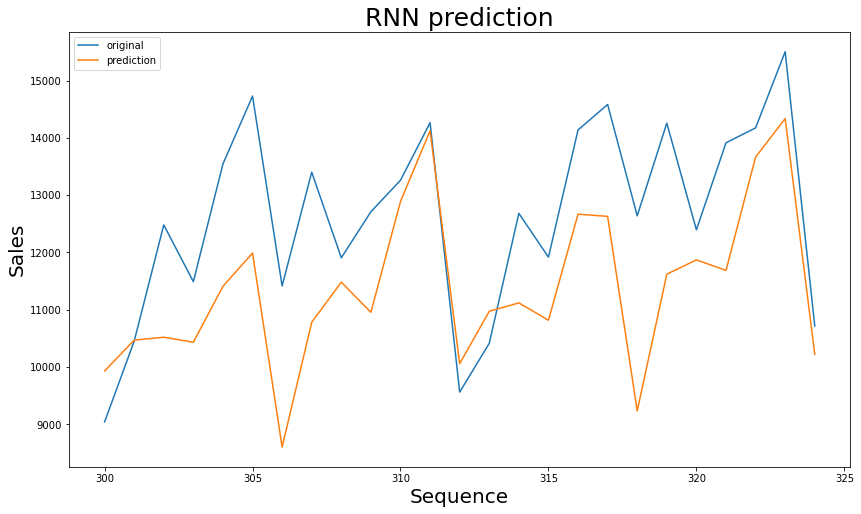

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('RNN prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 25ms/step - loss: 0.1500 - mae: 0.3201


[0.1499682366847992, 0.3201119601726532]